# Toronto COVID-19 Cases Project

Author: Adrienne Siu
Date: August 2020

# 1. Problem Definition

In this project, I will use machine learning to:
(1) Predict the outcomes of cases of COVID-19 in Toronto
(2) Find the variables that correlate most with the outcome

The dataset is available on Toronto Open Data and the version from July 29, 2020 was used: https://open.toronto.ca/dataset/covid-19-cases-in-toronto/

This dataset has been saved as 'COVID19 cases.csv'.

The three possible outcomes are: fatal, resolved (not fatal), and active.

In [1]:
# DELETE
%qtconsole
import pdb
#import contextlib
#with contextlib.redirect_stdout(None):
#import pixiedust

#%%pixie_debugger
#pdb.set_trace()

# 2. Exploratory Data Analysis (EDA)

In this section, I will explore the data, including correlations between variables and outcomes.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [3]:
# Path of dataset file (.csv)
covid_file_path = 'COVID19 cases.csv'

# Read the file
covid_data = pd.read_csv(covid_file_path)

In [4]:
# Display the first few rows of the dataset
covid_data.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,1,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,2,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,3,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,4,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,5,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In [5]:
# Function to obtain filtered entries in dataset
# Input: column_name is a string for the name of the column, e.g. 'Outbreak', 'Age Group'
#        filter_column is a string for the column to be filtered
#        filter_entry is a string for the entry to be filtered
# Ex. To filter only the fatal outcomes, filter_column = 'Outcome' and filter_entry = 'FATAL'
# Returns entries and value counts for the specific column after filtering
def get_filtered_entries_and_value_counts_from_column(column_name, filter_column, filter_entry):
    # Get the count of each unique entry (ordered by name)
    entry_vc = covid_data[covid_data[filter_column]==filter_entry][column_name].value_counts() #.sort_index()
    # Get the unique entries and put them in a list
    entry = entry_vc.index.tolist()    
    return entry, entry_vc

In [6]:
# Function to create a bar chart of a column variable with filters applied
# Stack by outcome: active, fatal, resolved
# Input: column_name is a string for the name of the column, e.g. 'Outbreak', 'Age Group'
#        filter_column is a string for the column to be filtered
#        filter_entry_list is a list of strings for entries to be filtered
def create_filtered_bar_chart(column_name, filter_column, filter_entry_list, fig_size):
    # Initialize lists of entries and value counts after filtering
    entry_list = []
    entry_vc_list = []
    
    # Figure size
    if fig_size == 'large':
        fig = plt.figure(figsize=(20,30))
    else:
        fig = plt.figure()

    # Loop through entries to be filtered
    for i in range(len(filter_entry_list)):
        # Entries and value counts for each filter
        entry, entry_vc = get_filtered_entries_and_value_counts_from_column(column_name, filter_column, filter_entry_list[i])
        # Append to list
        entry_list.append(entry)
        entry_vc_list.append(entry_vc)
        # Create a bar stacked for each filtered entry, e.g. 'Fatal', 'Active', 'Resolved'
        plt.bar(entry_list[i], entry_vc_list[i])
        #plt.barh(entry_list[i], entry_vc_list[i])

    # Invert the y-axis so that the order of the entries is from top to bottom
    #plt.gca().invert_yaxis()
    plt.title('Number of COVID-19 Cases By ' + column_name)
    plt.legend(filter_entry_list)
    plt.show()

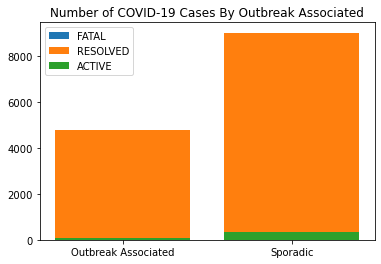

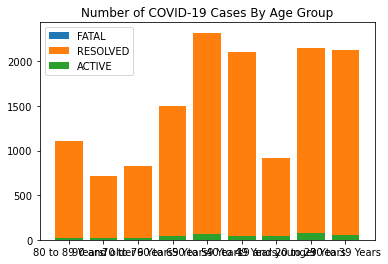

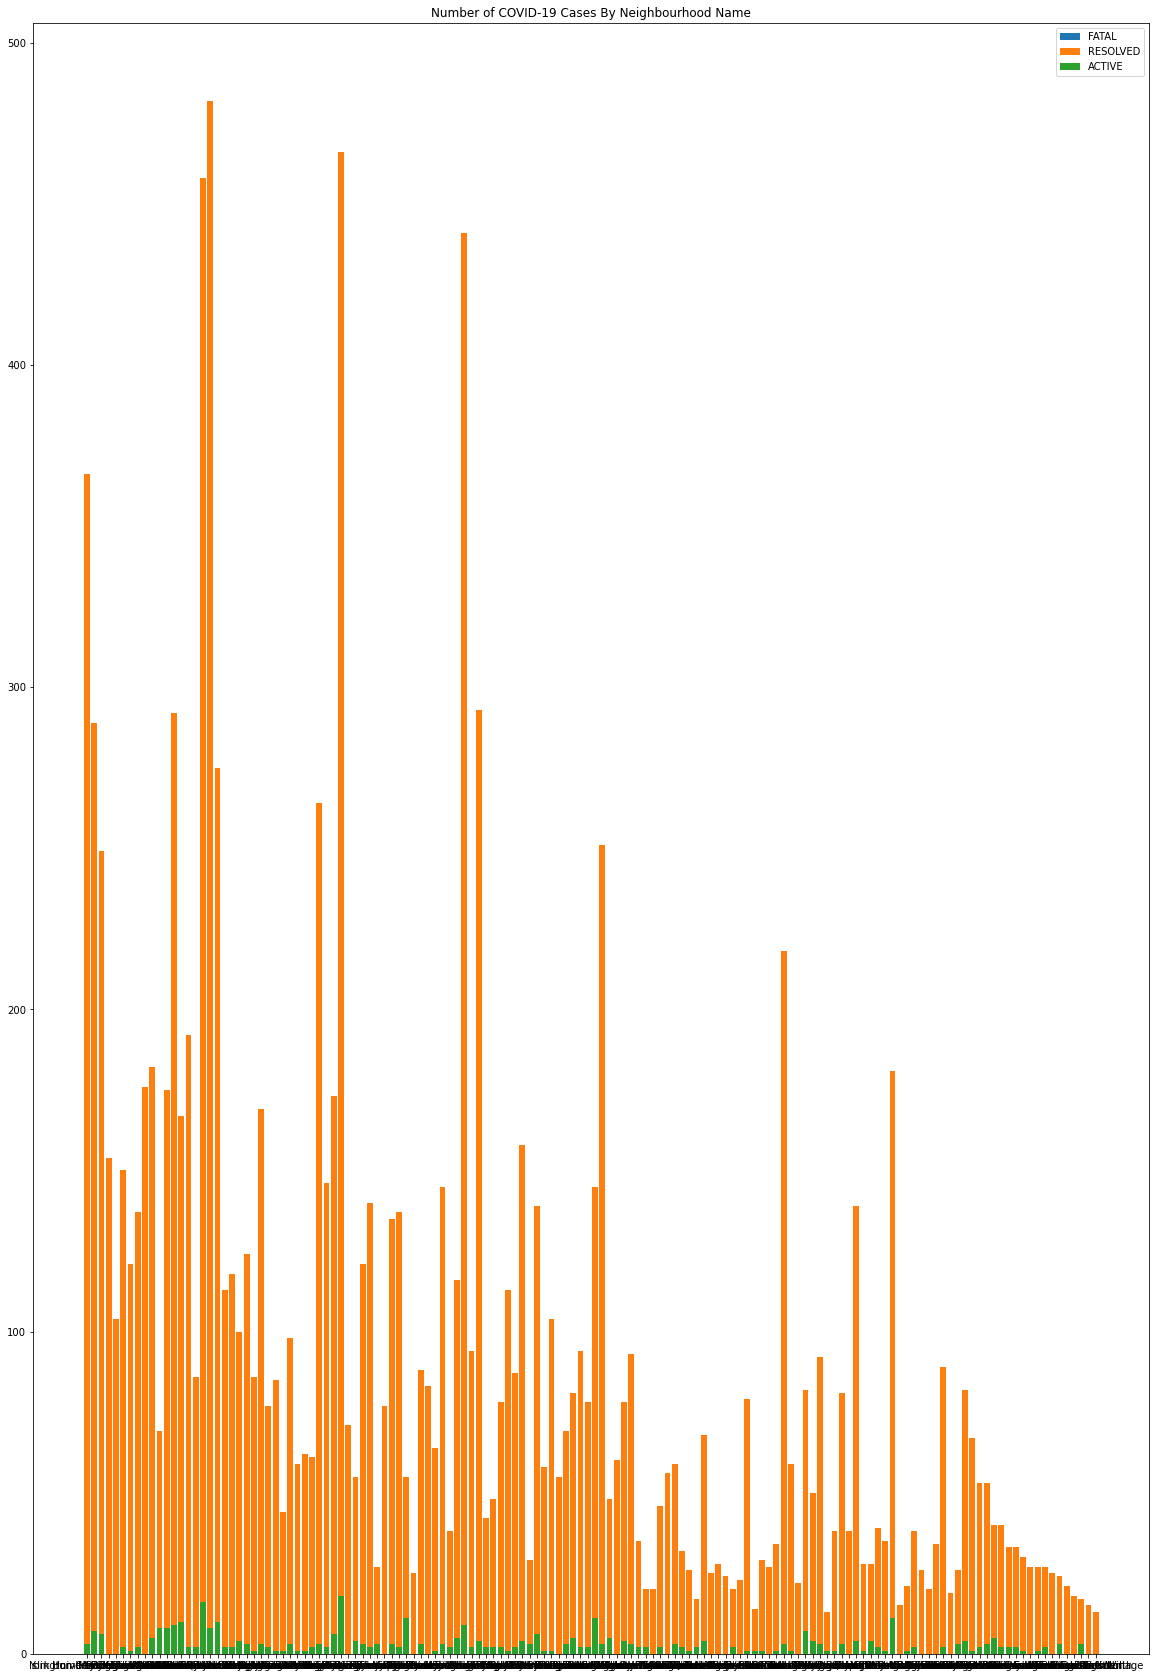

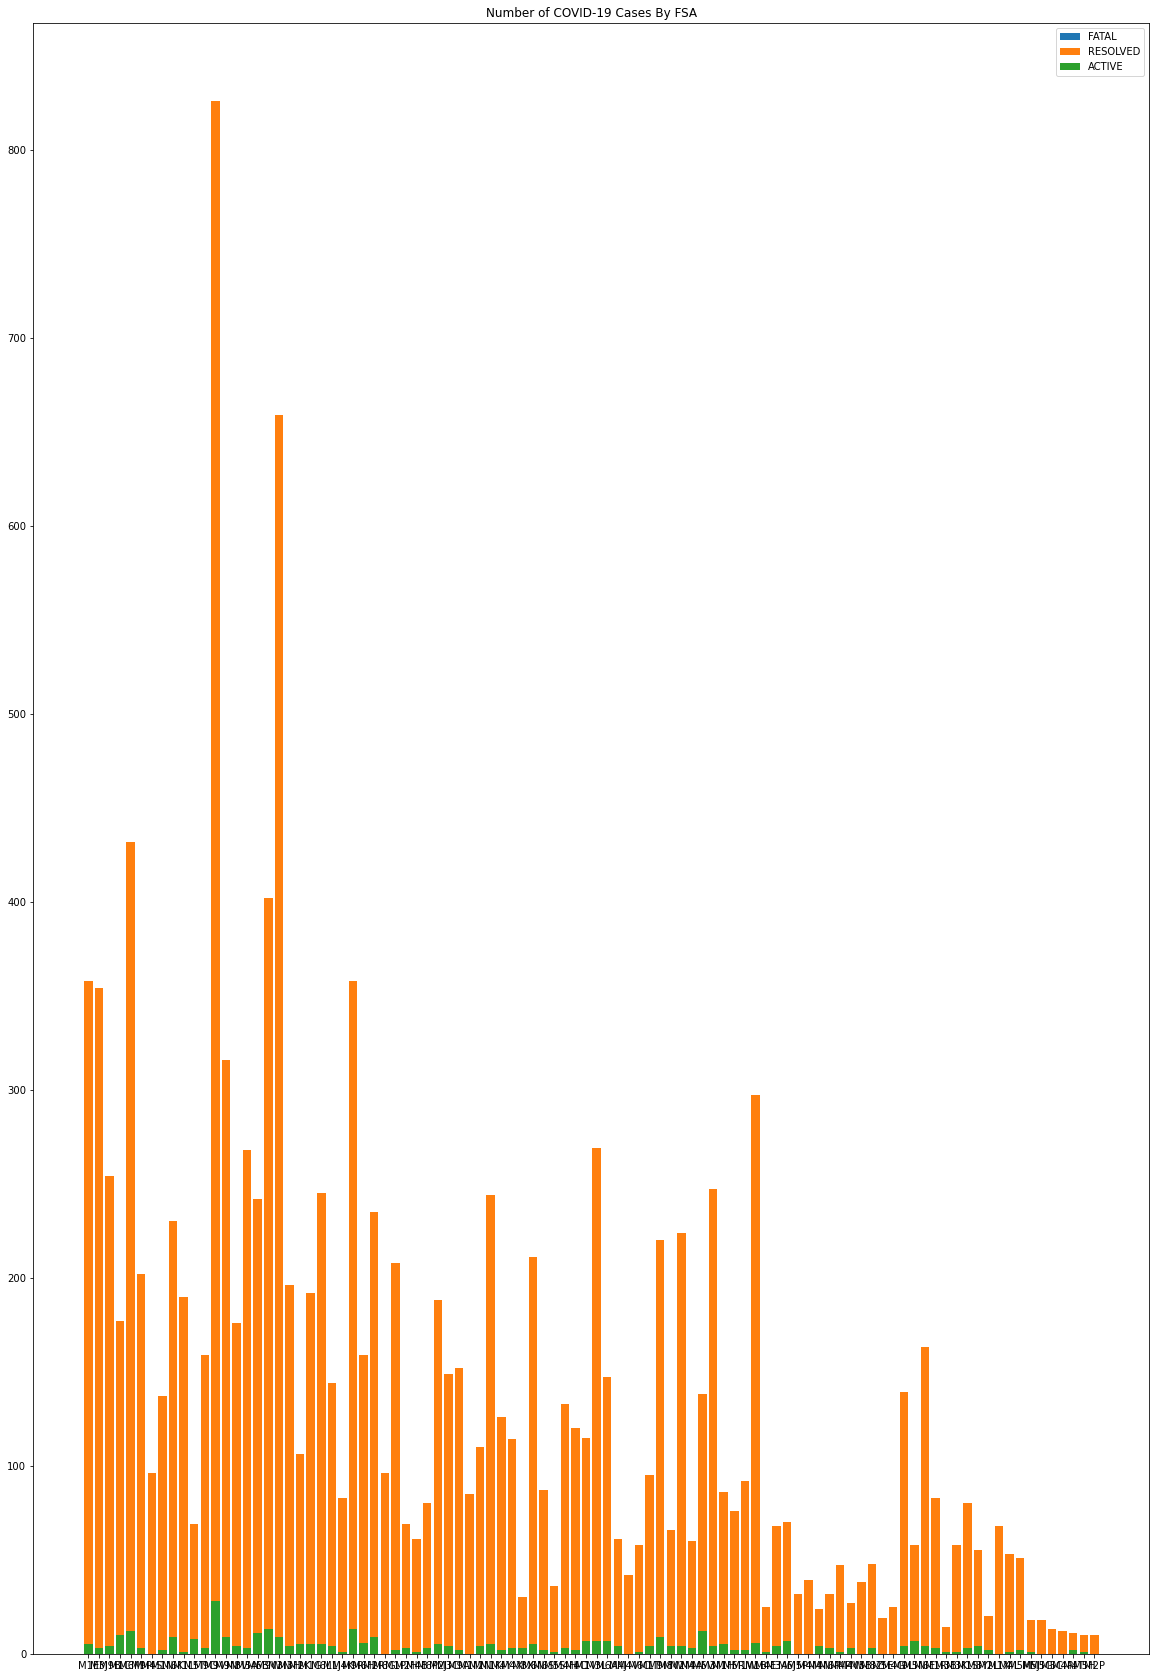

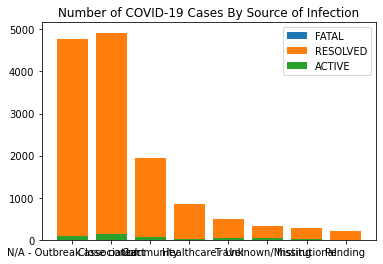

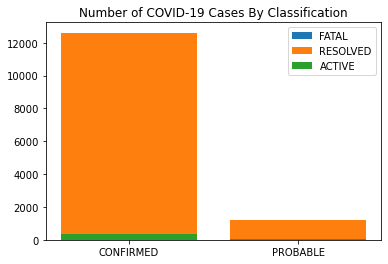

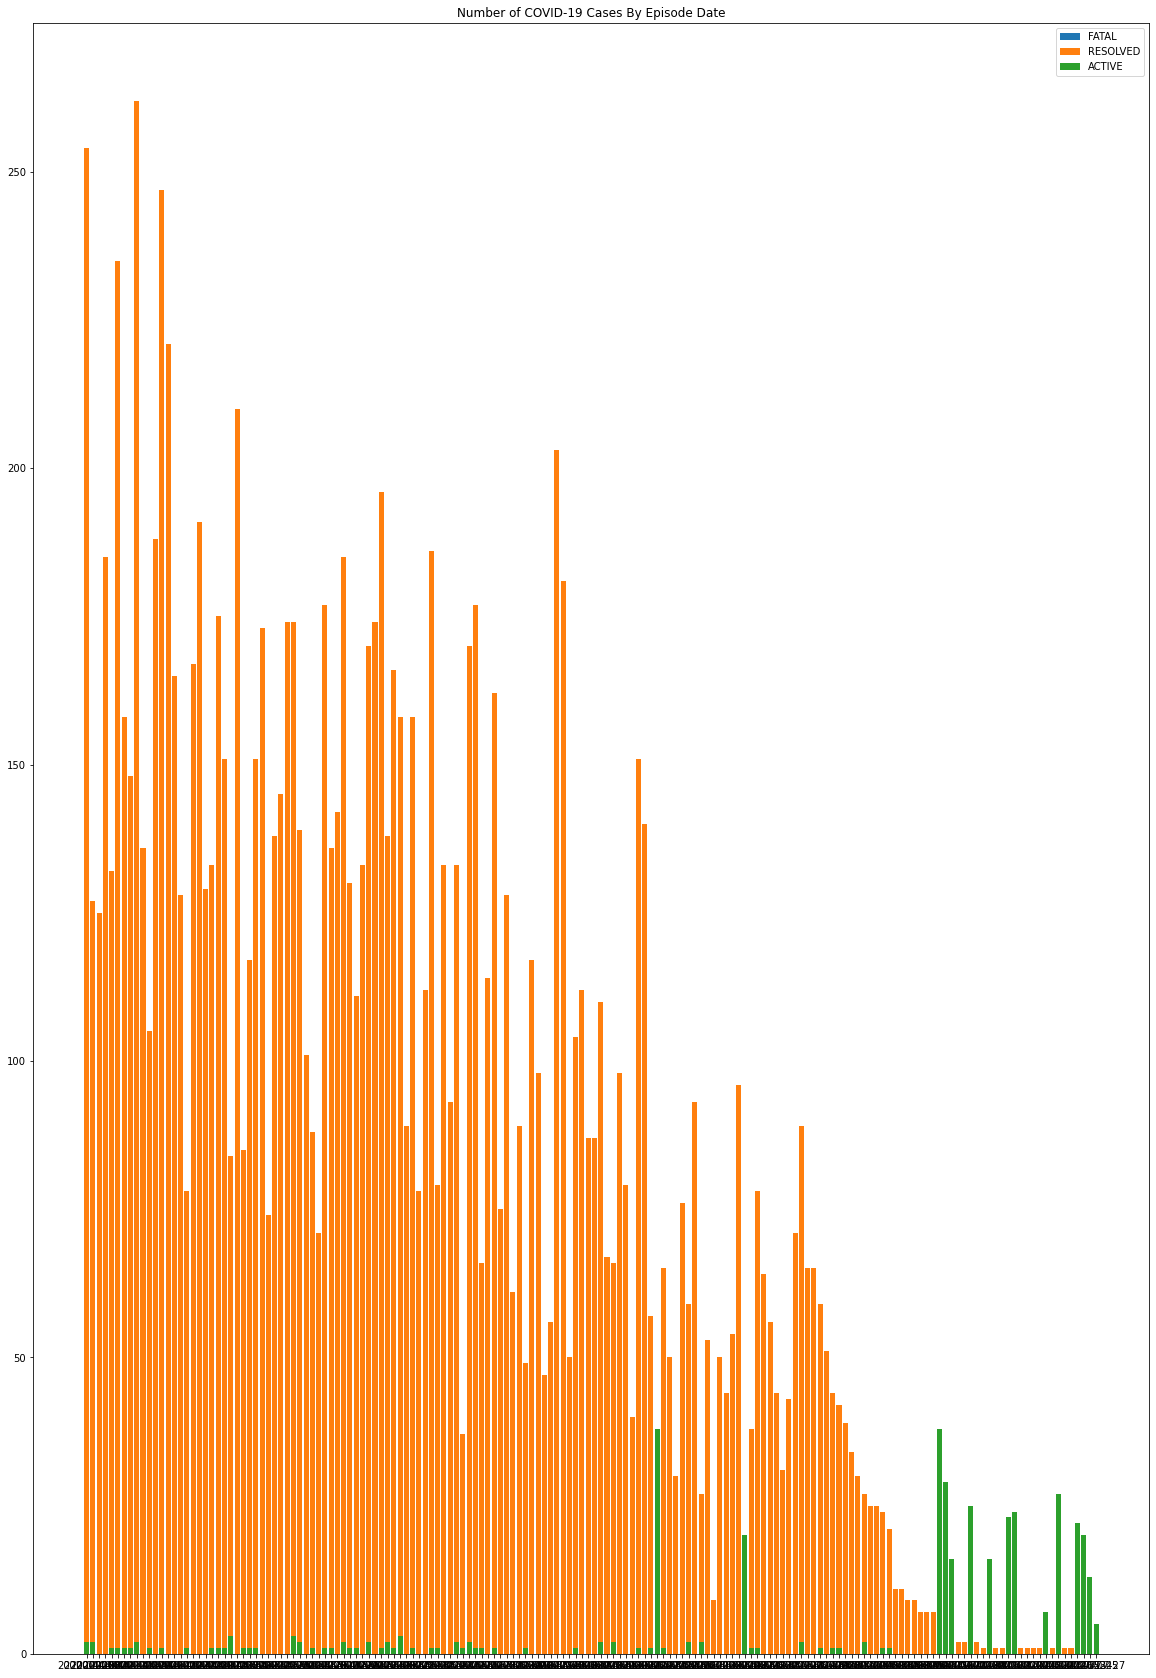

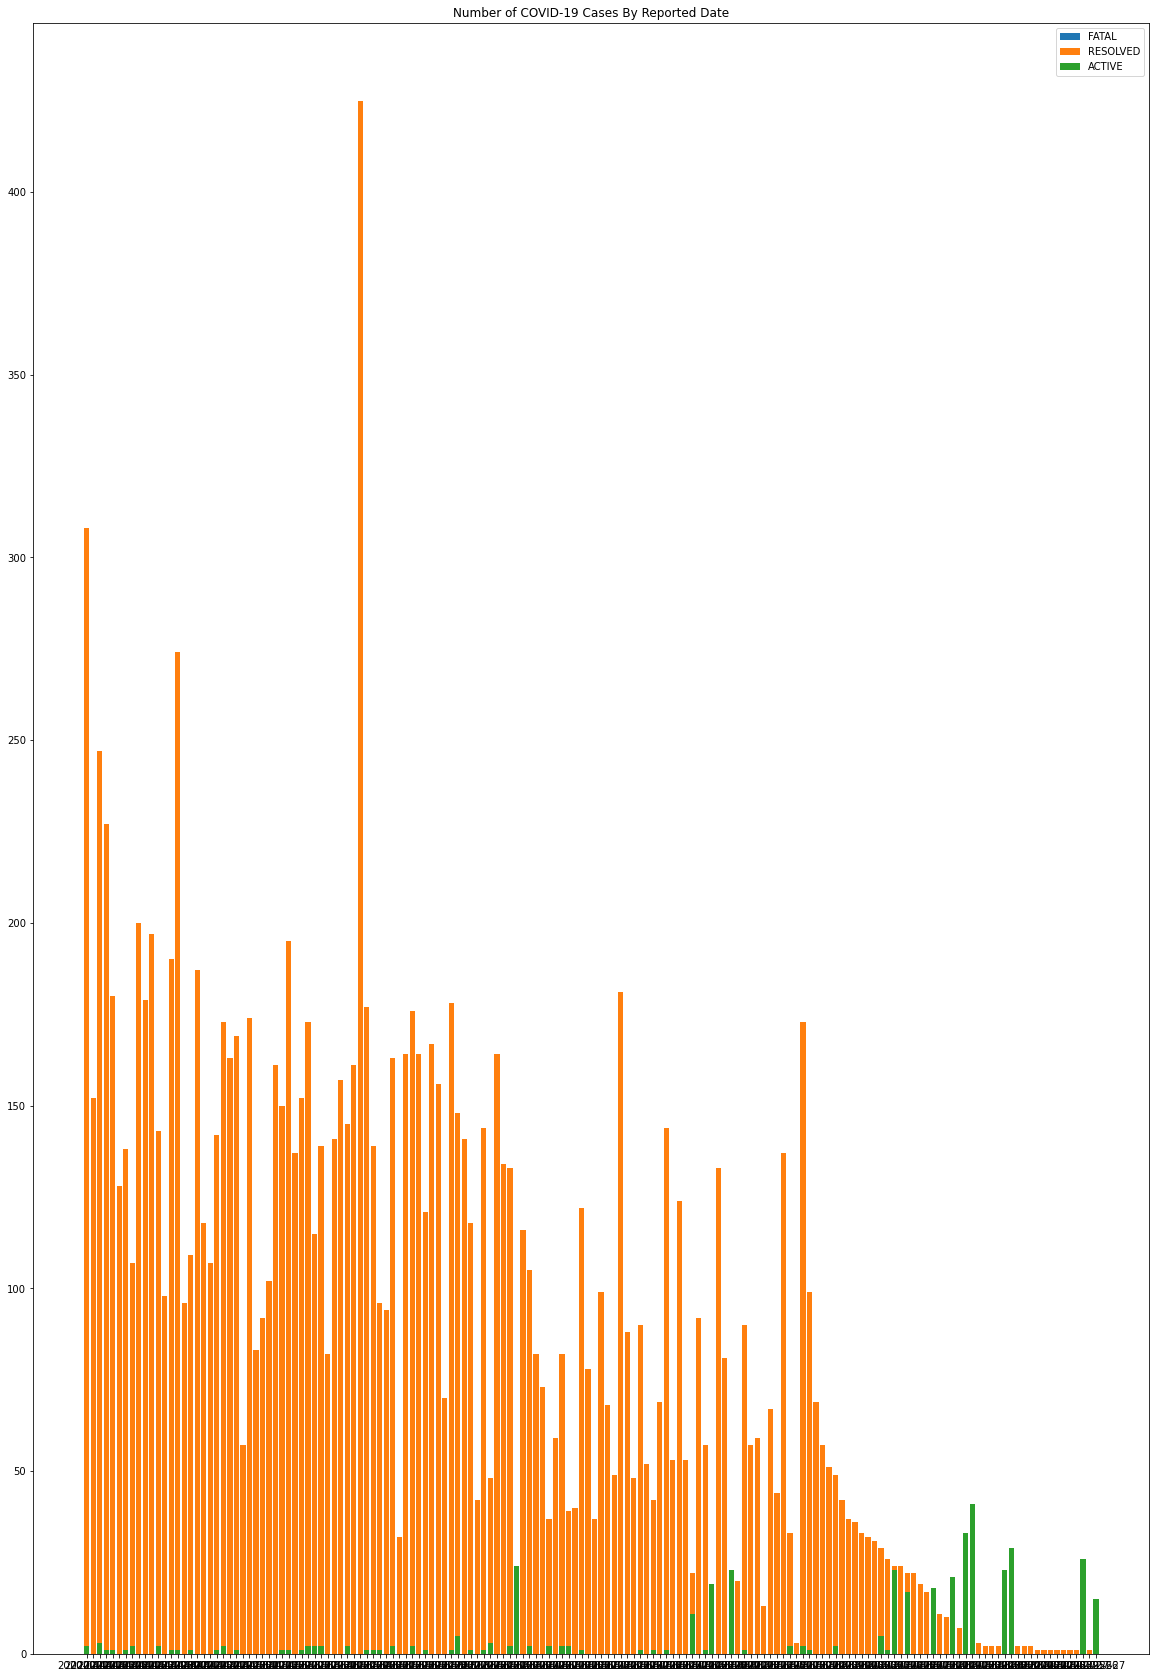

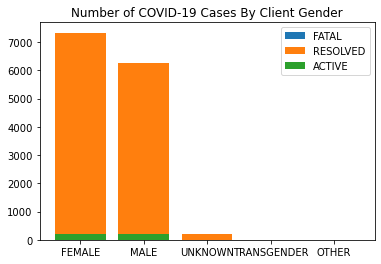

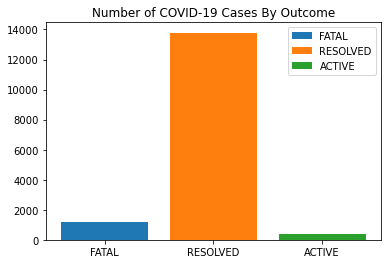

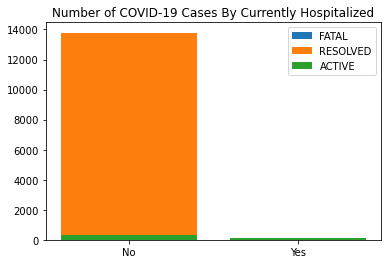

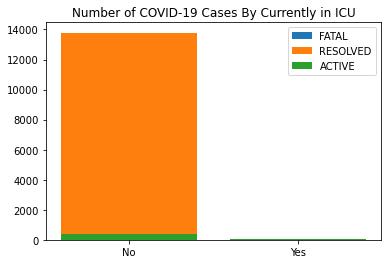

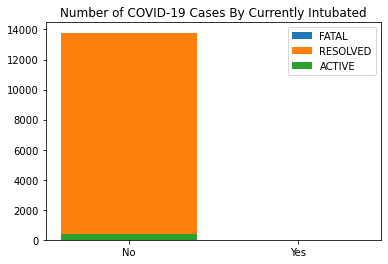

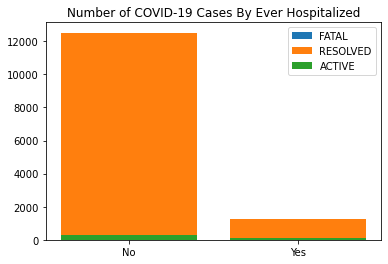

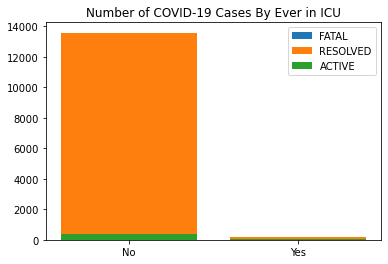

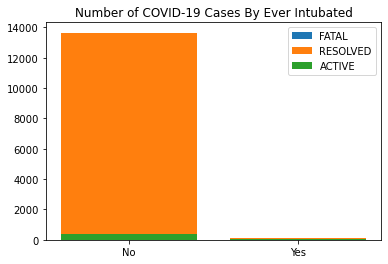

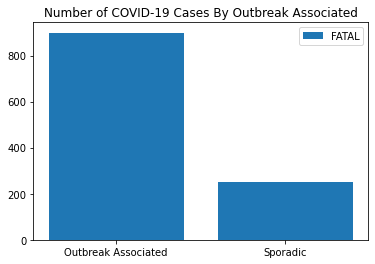

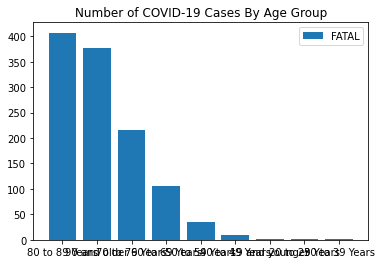

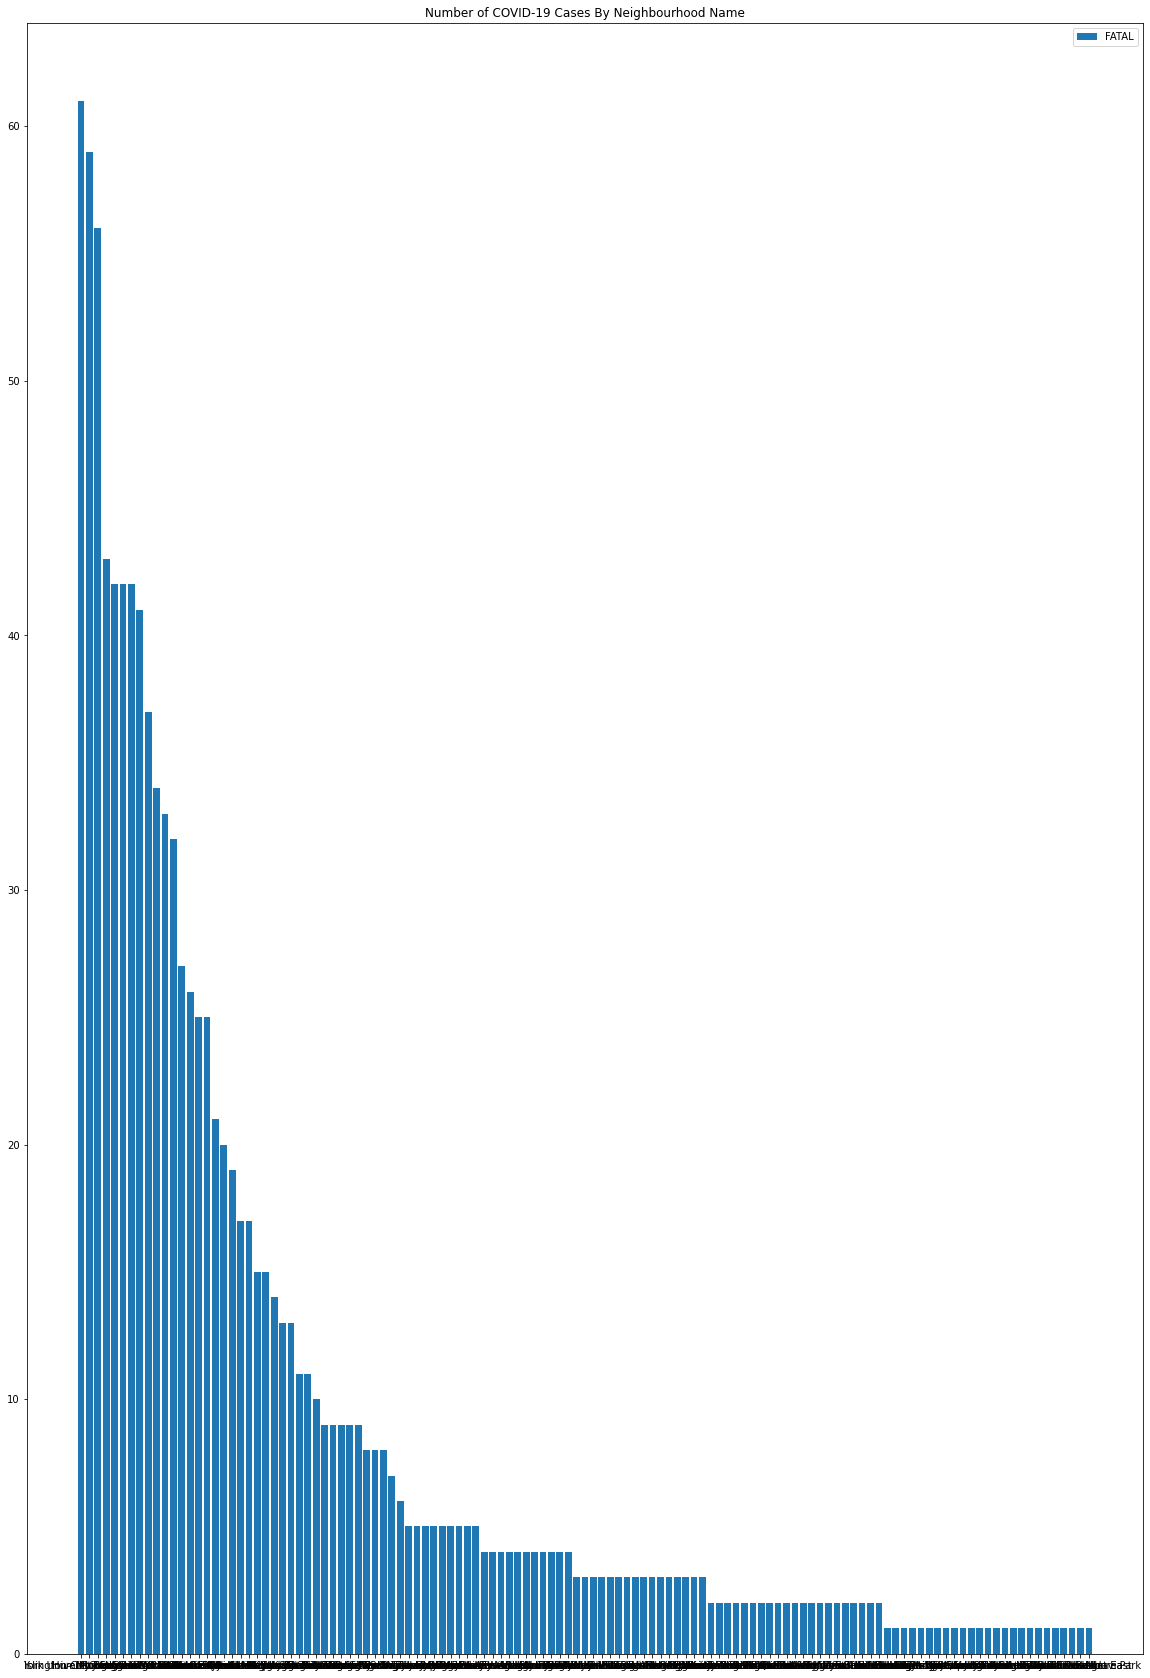

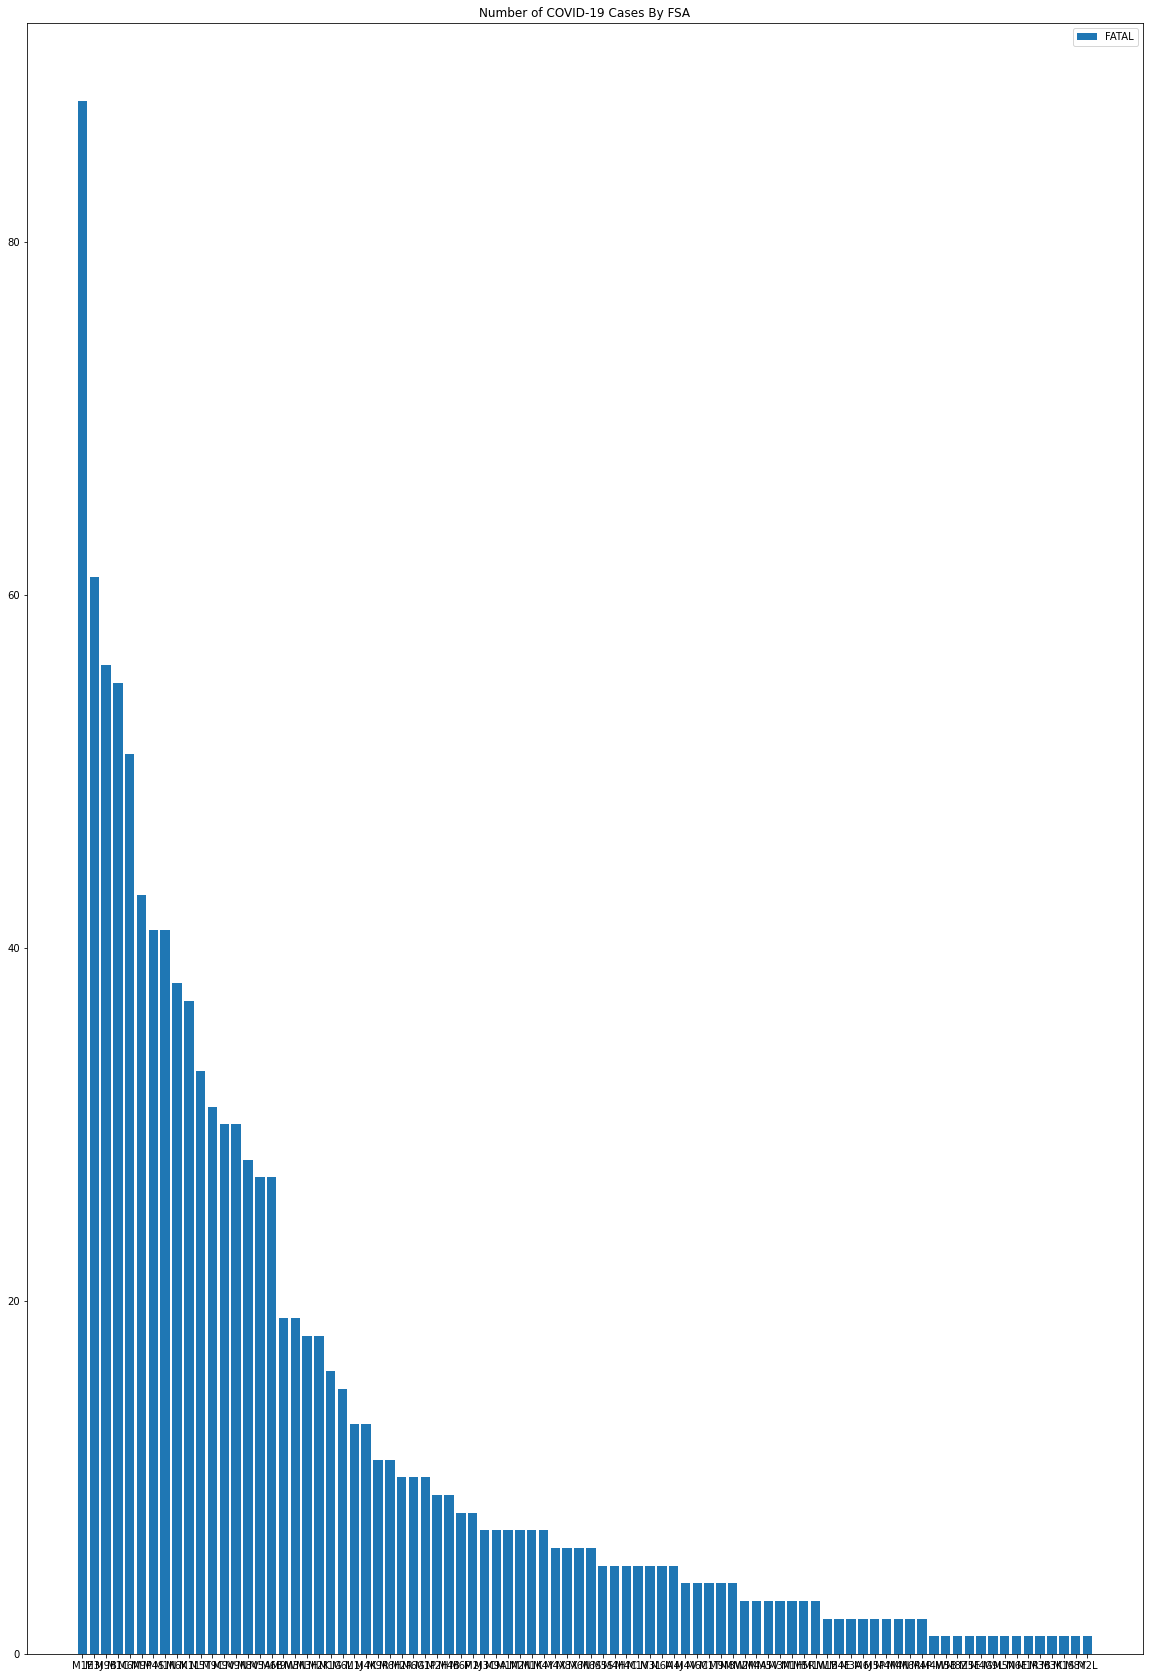

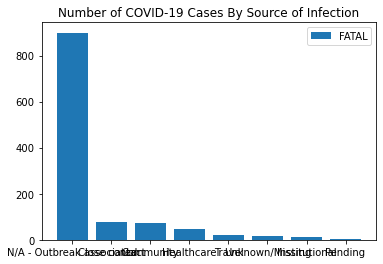

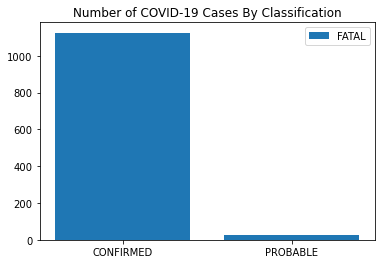

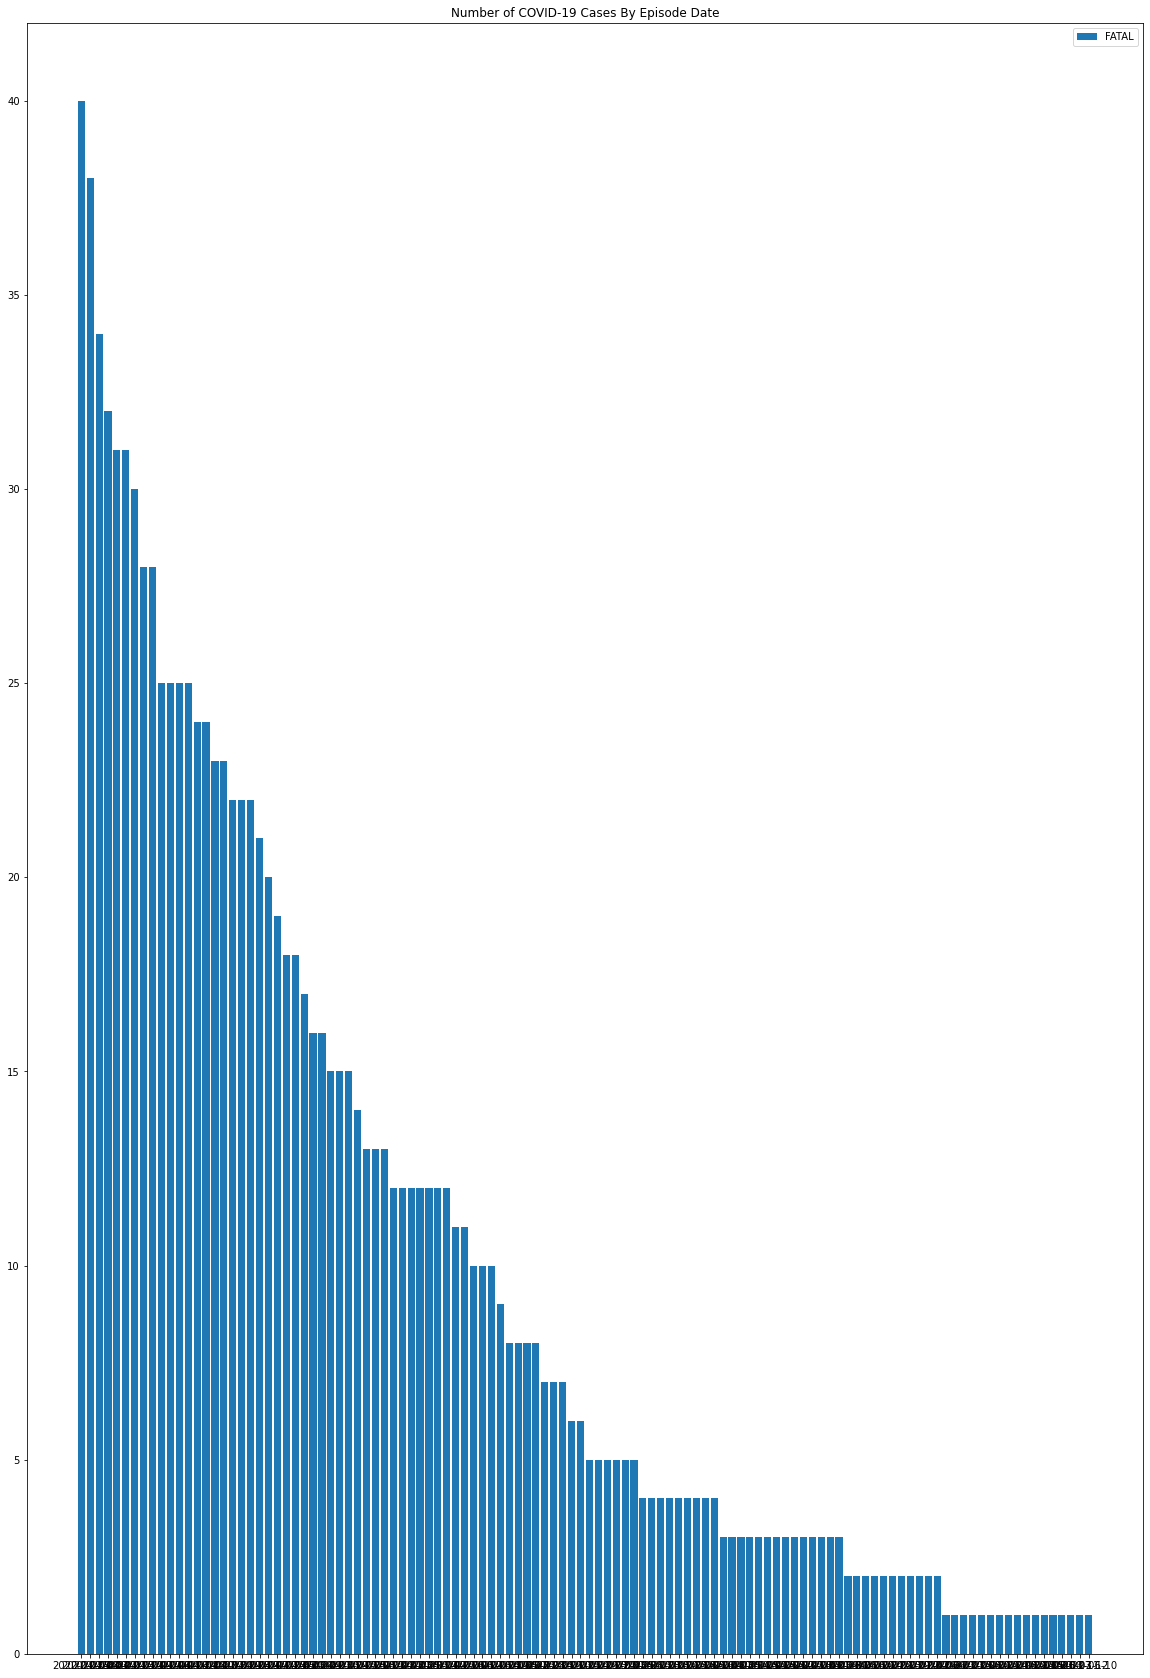

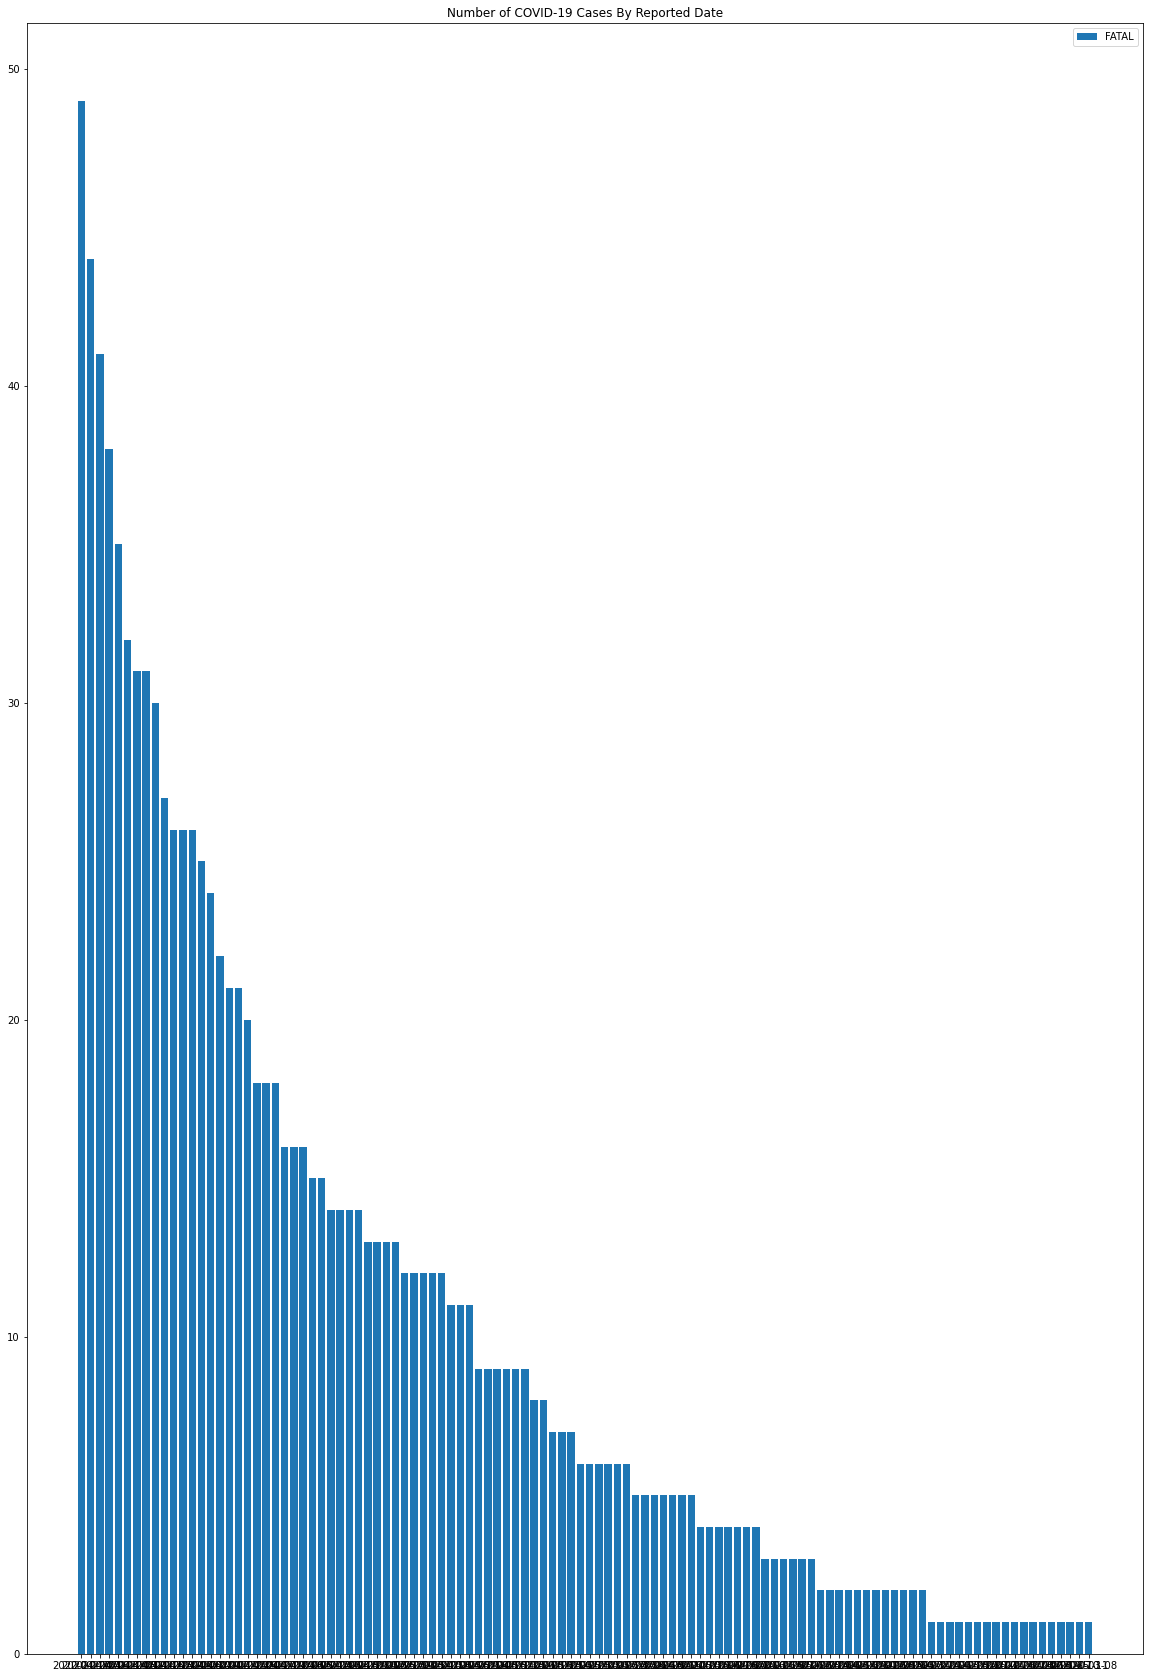

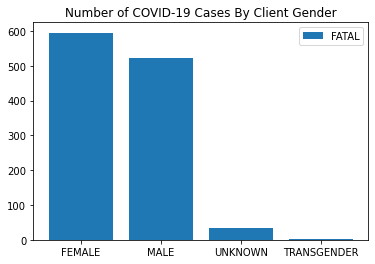

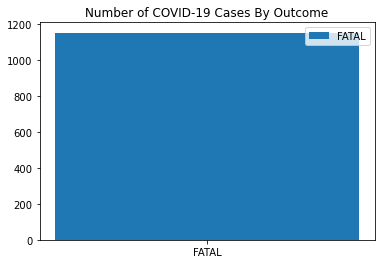

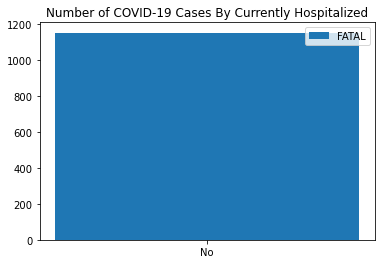

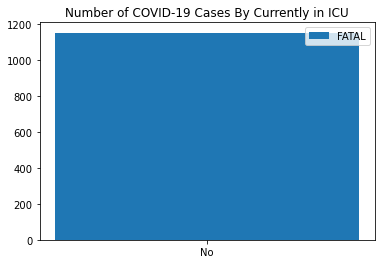

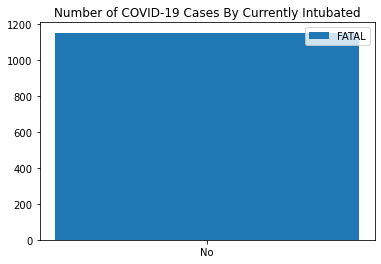

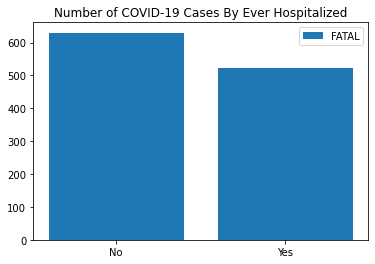

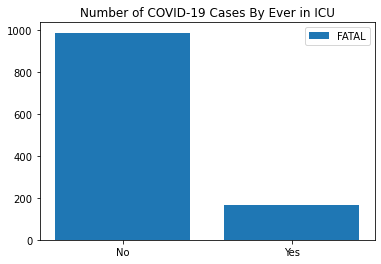

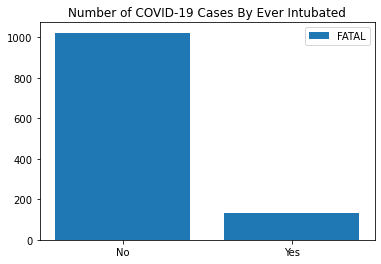

In [7]:
# Put the column names of the dataset into a list
columns = covid_data.columns

# Remove the first two column names (the IDs) because I don't need to graph them
columns_no_IDs = columns[2:]

# Column to be filtered
filter_column = 'Outcome'
# Entries to be filtered:
# First make stacked bar charts of all three outcomes, then bar charts of only fatal outcomes
filter_entry_list = [['FATAL', 'RESOLVED', 'ACTIVE'], ['FATAL']]

for j in range(len(filter_entry_list)):
    # Create bar charts for relevant columns
    for column in columns_no_IDs:
        #create_bar_chart(column)
        # Figure size
        if column == 'Neighbourhood Name' or column == 'FSA' or column == 'Episode Date' or column == 'Reported Date':
            fig_size = 'large'
        else:
            fig_size = 'normal'

        create_filtered_bar_chart(column, filter_column, filter_entry_list[j], fig_size)

The fatal cases make up 7.5% of total cases. As the number of resolved cases is an order of a magnitude higher, it is difficult to see the fatal cases in the bar charts. Hence, the fatal cases are graphed separately.

# 3. Data Cleaning

In this section, I will clean the data for analysis.

## Define training and validation sets

In [8]:
from sklearn.model_selection import train_test_split

# Target: outcome
y = covid_data.Outcome

# Predictor: drop _id, Assigned_ID, and Outcome columns
X = covid_data.drop(['_id', 'Assigned_ID', 'Outcome'], axis=1)

# Split into training and validation sets (80/20 split)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [9]:
# X_train.to_excel("X_train.xlsx")
# X_valid.to_excel("X_valid.xlsx")

In [10]:
# Function to create a table of missing values in columns
# Function written by Nikos Tavoularis on Stack Overflow: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
# Function comments by AS
def missing_values_table(df):
        # Count the number of missing values in each column
        mis_val = df.isnull().sum()
        # Calculate the percentage of missing values in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Put the number of missing values and % missing values in a table
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns of the table
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Take out columns with no missing values
        # Reorder columns with missing values in descending order
        # Round % missing values to 1 decimal place
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print summary
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return table of missing values
        return mis_val_table_ren_columns

In [11]:
# Create table of missing values
missing_values_table(covid_data)

Your selected dataframe has 18 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Neighbourhood Name,609,4.0
FSA,563,3.7
Age Group,27,0.2


As observed, there are only 3/18 columns with missing values. For each column, the % missing values is 4% or less. Hence, the dataset is fairly complete.

I will fill in the missing values as follows:

-- If both the neighbourhood name and FSA are blank, find the modal FSA and neighbourhood name (as a pair).
Note I am not using SimpleImputer because I would like to consider the relationship between the neighbourhood name and FSA. If the modal neighbourhood name and modal FSA are treated separately as in SimpleImputer, the resulting pair
of neighbourhood name and FSA could be impossible in real life.

-- If the neighbourhood name is blank but the FSA is known, find the modal neighbourhood name for the given FSA.

-- Note that there are no cases of the FSA being blank but the neighbourhood name is known.

-- The age group will be filled with modal imputation, i.e. the modal age group. Note that the median and the modal age group in the training set are the same, so median imputation would also yield the same result.

In [12]:
# Functions for neighbourhood name and FSA imputation
# If both the neighbourhood and FSA are blank, find the modal FSA and neighbourhood name (as a pair)
# Input: dataset for imputation
# Output: modal FSA and neighbourhood name, sorted dataset
def find_mode_fsa_nn(data):
    # Group data by FSA and neighbourhood and count number of occurrences
    fsa_nn_group_data = data.groupby(['FSA', 'Neighbourhood Name'])['Outbreak Associated'].agg([len]).reset_index()
    # Sort from highest to lowest count (i.e. the mode is the first value)
    fsa_nn_group_data_sorted = fsa_nn_group_data.sort_values(by='len', ascending=False)
    # Find modal neighbourhood name and FSA
    mode_fsa = fsa_nn_group_data_sorted.iloc[0]['FSA']
    mode_nn = fsa_nn_group_data_sorted.iloc[0]['Neighbourhood Name']
    return mode_fsa, mode_nn, fsa_nn_group_data_sorted

# Impute missing values for the neighbourhood name and FSA
# Note there are no cases when the neighbourhood name is known but the FSA is blank
# Input: dataset, sorted dataset
def impute_missing_fsa_nn(data, mode_fsa, mode_nn, fsa_nn_group_data_sorted):
    # If an entry is blank, it is a 'NaN' and hence a float
    # If an entry is not blank, it is a string
    for i in data.index:
         # If both the neighbourhood name and FSA are blank
        if type(data['Neighbourhood Name'][i]) == float and type(data['FSA'][i]) == float:
            # Use the modal FSA and neighbourhood name
            data['FSA'][i] = mode_fsa
            data['Neighbourhood Name'][i] = mode_nn
            #print("Instance 1", i, data['FSA'][i], data['Neighbourhood Name'][i])

         # If the neighbourhood name is blank but the FSA is known
        if type(data['Neighbourhood Name'][i]) == float and type(data['FSA'][i]) != float:
            # Find the modal neighbourhood name for the given FSA
            # i.e. find the first instance of FSA in fsa_nn_group_data_sorted and its associated neighbourhood name
            mode_nn_for_fsa = fsa_nn_group_data_sorted.loc[fsa_nn_group_data_sorted['FSA'] == data['FSA'][i]].iloc[0]
            data['Neighbourhood Name'][i] = mode_nn_for_fsa['Neighbourhood Name']
            #print("Instance 2", i, data['Neighbourhood Name'][i])
    return data

In [13]:
# Make new copies of datasets
# y doesn't have any missing values, so imputation is not needed
X_train_imp_area = X_train.copy()
X_valid_imp_area = X_valid.copy()

# On the training set, return the mode FSA, mode neighbourhood name, and sorted training set
mode_fsa, mode_nn, fsa_nn_group_data_sorted = find_mode_fsa_nn(X_train_imp_area)

# Impute missing FSA and neighbourhood name values in the training set
X_train_imp_area = impute_missing_fsa_nn(X_train_imp_area, mode_fsa, mode_nn, fsa_nn_group_data_sorted)

# Impute missing FSA and neighbourhood name values in the validation set based on the modes
# in the training set
X_valid_imp_area = impute_missing_fsa_nn(X_valid_imp_area, mode_fsa, mode_nn, fsa_nn_group_data_sorted)

In [14]:
# Age group: modal imputation
from sklearn.impute import SimpleImputer

# Convert all columns to strings to avoid error with data type
X_train_new = X_train_imp_area.applymap(str) # Convert blanks to 'nan'
X_valid_new = X_valid_imp_area.applymap(str) 

# Imputer with most_frequent (modal) strategy (note this removes the original indices of the entries)
imputer = SimpleImputer(missing_values='nan', strategy='most_frequent', verbose=1)
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train_new)) 
X_valid_imp = pd.DataFrame(imputer.transform(X_valid_new))

# Rename columns
X_train_imp.columns = X_train_imp_area.columns
X_valid_imp.columns = X_valid_imp_area.columns

# Put back the original indices
X_train_imp.index = X_train_imp_area.index
X_valid_imp.index = X_valid_imp_area.index

In [15]:
# fsa_nn_group_data_sorted.to_excel("fsa_nn_group_data_sorted.xlsx")
# X_train_imp_area.to_excel("X_train_imp_area.xlsx")
# X_valid_imp_area.to_excel("X_valid_imp_area.xlsx")
# X_train_imp.to_excel("X_train_imp.xlsx")
# X_valid_imp.to_excel("X_valid_imp.xlsx")
# X_train_new.to_excel("X_train_new.xlsx")
# X_valid_new.to_excel("X_valid_new.xlsx")

In [16]:
# Check for missing values
missing_values_table(X_train_imp)
missing_values_table(X_valid_imp)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.
Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Missing values have been removed.

# 4. Feature Selection and Engineering

Feature engineering will involve encoding the features:

-- Outbreak Associated (2 values): one-hot encoding with binary values, equivalent to label encoding (0/1) to avoid the dummy variable trap

-- Age Group (9 values): label encoding

-- Neighbourhood Name and FSA: one-hot encoding with 'Other' column for rare cases

-- Source of Infection (8 values): one-hot encoding

-- Classification (2 values): one-hot encoding with binary values, equivalent to label encoding (0/1)

-- Episode Date and Reported Date: encode month, date, day of the week as cyclical features (other possibilities: time since interesting event? holiday? season?)

-- Client Gender (5 values): one-hot encoding

-- Currently Hospitalized, Currently in ICU, Currently Intubated, Ever Hospitalized, Ever in ICU, Ever Intubated (2 values): one-hot encoding with binary values, equivalent to label encoding (0/1)

CONSIDER SCALING AT THE END (FOR THE AGE GROUP)

Feature selection will involve removing unnecessary features.

In [17]:
# Outbreak Associated, Age Group, Currently Hospitalized, Currently in ICU, Currently Intubated, 
# Ever Hospitalized, Ever in ICU, Ever Intubated: label encoding

from sklearn.preprocessing import LabelEncoder

# Specify columns for label encoding
lbl_enc_col = ['Outbreak Associated', 'Age Group', 'Classification', 'Currently Hospitalized', 'Currently in ICU', \
               'Currently Intubated', 'Ever Hospitalized', 'Ever in ICU', 'Ever Intubated']

# Define the label encoder
lbl_enc = LabelEncoder()

# Make a copy
X_train_lbl = X_train_imp.copy()
X_valid_lbl = X_valid_imp.copy()

# Loop through all of the specified columns
for col in lbl_enc_col:
    X_train_lbl[col] = lbl_enc.fit_transform(X_train_lbl[col])
    X_valid_lbl[col] = lbl_enc.transform(X_valid_lbl[col])
    
# Put back indices
X_train_lbl.index = X_train_imp.index
X_valid_lbl.index = X_valid_imp.index

In [18]:
# Source of Infection, Client Gender: normal one-hot encoding

from sklearn.preprocessing import OneHotEncoder

# Specify columns for one-hot encoding
oh_col = ['Source of Infection', 'Client Gender']

# One-hot encoder:
# Return an array instead of a sparse matrix
# Drop last value to avoid the dummy variable trap and also because the unknown columns aren't very helpful
oh_enc = OneHotEncoder(handle_unknown='error', sparse=False, drop=[['Unknown/Missing'], ['UNKNOWN']])
X_train_oh_col = pd.DataFrame(oh_enc.fit_transform(X_train_lbl[oh_col]))
X_valid_oh_col = pd.DataFrame(oh_enc.transform(X_valid_lbl[oh_col]))

# Put back the indices
X_train_oh_col.index = X_train_lbl.index
X_valid_oh_col.index = X_valid_lbl.index

# Make copies of the dataframes
X_train_oh = X_train_lbl.copy()
X_valid_oh = X_valid_lbl.copy()

In [19]:
# Function to rename one-hot encoded columns, dropping last value
# Output: return dataframe with renamed columns
# Input: X_train_oh_col or X_valid_oh_col (one-hot encoded columns);
#        oh_enc (one-hot encoder)
def rename_col_oh(X_oh_col, oh_enc):
    X_oh_col.columns = np.concatenate((oh_enc.categories_[0][:-1], oh_enc.categories_[1][:-1]))
    return X_oh_col

# Function to put the one-hot encoded columns back into the dataframe
# Keep the original order for now
# Output: return ordered dataframe
# Input: X_train_oh or X_valid_oh (dataframe to modify); X_train_oh_col or X_valid_oh_col (one-hot encoded columns);
#        oh_enc (one-hot encoder)
def order_col_oh(X_oh, X_oh_col, oh_enc):
    X_oh = pd.concat([X_oh.loc[:,'Outbreak Associated':'FSA'], \
    X_oh_col.loc[:,oh_enc.categories_[0][0]:oh_enc.categories_[0][-2]], # Source of Infection
    X_oh.loc[:,'Classification':'Reported Date'], \
    X_oh_col.loc[:,oh_enc.categories_[1][0]:oh_enc.categories_[1][-2]], # Client Gender
    X_oh.loc[:,'Currently Hospitalized':'Ever Intubated']], axis=1, sort=False)
    return X_oh

In [20]:
# Rename one-hot encoded columns, dropping last value
X_train_oh_col = rename_col_oh(X_train_oh_col, oh_enc)
X_valid_oh_col = rename_col_oh(X_valid_oh_col, oh_enc)

# Put the one-hot encoded columns back into the dataframe
X_train_oh = order_col_oh(X_train_oh, X_train_oh_col, oh_enc)
X_valid_oh = order_col_oh(X_valid_oh, X_valid_oh_col, oh_enc)

In [21]:
# Neighbourhood Name and FSA: one-hot encoding with 'Other' column for rare cases
# Based on Maya Gilad's tutorial here: https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0

# Value counts (number of cases associated with each FSA)
X_train_oh['FSA'].value_counts()
# Statistics
X_train_oh['FSA'].value_counts().describe()
# Normalized value counts
X_train_oh['FSA'].value_counts(normalize=True)
# Normalized value counts: statistics
X_train_oh['FSA'].value_counts(normalize=True).describe()

count    96.000000
mean      0.010417
std       0.011812
min       0.000489
25%       0.003464
50%       0.007131
75%       0.014283
max       0.093806
Name: FSA, dtype: float64

In [22]:
# Value counts (number of cases associated with each Neighbourhood Name)
X_train_oh['Neighbourhood Name'].value_counts()
# Statistics
X_train_oh['Neighbourhood Name'].value_counts().describe()
# Normalized value counts
X_train_oh['Neighbourhood Name'].value_counts(normalize=True)
# Normalized value counts: statistics
X_train_oh['Neighbourhood Name'].value_counts(normalize=True).describe()

count    140.000000
mean       0.007143
std        0.008205
min        0.000733
25%        0.002200
50%        0.004808
75%        0.009311
max        0.068297
Name: Neighbourhood Name, dtype: float64

In [23]:
# # NEED TO EDIT: FSA AND NN ARE TREATED SEPARATELY
# # Normalized value counts
# norm_vc_fsa = X_train_oh['FSA'].value_counts(normalize=True, ascending=True)
# norm_vc_nn = X_train_oh['Neighbourhood Name'].value_counts(normalize=True, ascending=True)

# # Inferred threshold
# # Having 10% of outcomes in the 'Other' category seems to be a good starting point, so I will use this
# # to set the threshold
# thresh_fsa = norm_vc_fsa[(norm_vc_fsa.cumsum() > 0.1).idxmax()]
# thresh_nn = norm_vc_nn[(norm_vc_nn.cumsum() > 0.1).idxmax()]
# print(thresh_fsa, thresh_nn)
# ## I will take the higher of the two thresholds to be the overall threshold
# #thresh = np.maximum(thresh_fsa, thresh_nn)

# # FSA
# # Normalized value counts (in descending order)
# norm_vc_fsa_desc = X_train_oh['FSA'].value_counts(normalize=True)
# # Map the FSA to its normalized value count
# fsa_map = X_train_oh['FSA'].map(norm_vc_fsa_desc)
# # Replace the FSA with 'Other' when the normalized value count is less than the threshold
# new = X_train_oh['FSA'].mask(fsa_map < thresh_fsa, 'Other')

0.0052159739201303994 0.003341483292583537


In [24]:
# Determine rare cases of the FSA and neighbourhood name 
# FSA and neighbourhood name are treated as a set, i.e. the number of occurrences of a particular combination of
# FSA and neighbourhood name are found.
# Otherwise, if the FSA and NN are treated independently, you may have cases where one of the FSA and NN are 
# labelled 'Other', but not both. This would result in more missing information.

# Make a copy of the dataset
X_train_other = X_train_oh.copy()
X_valid_other = X_valid_oh.copy()

# For the training set: group data by FSA and neighbourhood and count number of occurrences
fsa_nn = X_train_other.groupby(['Neighbourhood Name', 'FSA'])['Outbreak Associated'].agg([len]).reset_index()
# Sort from lowest to highest count
fsa_nn_sorted = fsa_nn.sort_values(by='len', ascending=True)
# Normalize the value counts (or length)
norm_vc = fsa_nn_sorted['len']/(np.sum(fsa_nn_sorted['len']))
## Map the normalized value counts to the sorted dataframe
#fsa_nn_map = fsa_nn_sorted['FSA'].map(norm_vc)
# Add a new column with normalized value counts
fsa_nn_sorted['norm_vc'] = norm_vc

# Inferred threshold
# Having 10% of outcomes in the 'Other' category seems to be a good starting point, so I will use this
# to set the threshold
thresh_fsa_nn = norm_vc.loc[(norm_vc.cumsum() > 0.1).idxmax()]

# Normalized value counts (in descending order)
fsa_nn_sorted_desc = fsa_nn_sorted.sort_values(by='norm_vc', ascending=False)

In [25]:
# Function to return dataframe with rare FSA and Neighbourhood Name cases as 'Other'
# Output: modified dataframe (either training set or validation set)
# Input: data: original dataframe (either training set or validation set)
#        fsa_nn_sorted_desc: dataframe with sorted FSA and NN value counts
#        thresh_fsa_nn: normalized-value-count threshold for 'Other' cases
def data_with_fsa_nn_other(data, fsa_nn_sorted_desc, thresh_fsa_nn):
    # Merge the training data with the normalized value counts
    norm_vc_merge = data[['Neighbourhood Name', 'FSA']].merge(fsa_nn_sorted_desc, how='left', indicator=True)['norm_vc']
    # Make the indices the same (norm_vc is ordered by index)
    norm_vc_merge.index = data.index
    # Add the norm_vc column to the training data
    data['norm_vc'] = norm_vc_merge
    # Replace the Neighbourhood Name and FSA with 'Other' when the normalized value count is less than the threshold
    data[['Neighbourhood Name', 'FSA']] = data[['Neighbourhood Name', 'FSA']].mask(data['norm_vc'] < thresh_fsa_nn, 'Other')
    # Remove norm_vc column
    data = data.drop(['norm_vc'], axis=1)
    return data

In [26]:
# Dataframes with rare FSA and Neighbourhood Name cases as 'Other'
# Use normalized value counts and threshold for the FSA and NN from the training set and apply to the validation set
X_train_other = data_with_fsa_nn_other(X_train_other, fsa_nn_sorted_desc, thresh_fsa_nn)
X_valid_other = data_with_fsa_nn_other(X_valid_other, fsa_nn_sorted_desc, thresh_fsa_nn)

In [27]:
# Look for categorical variables
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15338 entries, 0 to 15337
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   _id                     15338 non-null  int64 
 1   Assigned_ID             15338 non-null  int64 
 2   Outbreak Associated     15338 non-null  object
 3   Age Group               15311 non-null  object
 4   Neighbourhood Name      14729 non-null  object
 5   FSA                     14775 non-null  object
 6   Source of Infection     15338 non-null  object
 7   Classification          15338 non-null  object
 8   Episode Date            15338 non-null  object
 9   Reported Date           15338 non-null  object
 10  Client Gender           15338 non-null  object
 11  Outcome                 15338 non-null  object
 12  Currently Hospitalized  15338 non-null  object
 13  Currently in ICU        15338 non-null  object
 14  Currently Intubated     15338 non-null  object
 15  Ev

Apart from the patient ID, the columns are all categorical variables. I will deal with encoding for categorical variables in the modelling section.